O que é o teste Bechdel?


---


O teste de Bechdel leva o nome da cartunista Alison Bechdel, que apresentou a ideia em uma história em quadrinhos no ano de 1985. Para passar no teste, uma história precisa ter:


1.   Pelo menos duas mulheres
2.   As mulheres precisam conversar umas com as outras
3.   Eles precisam falar um com o outro sobre algo que não seja um homem

A questão dos dados


---


Meu objetivo era coletar dados de várias fontes diferentes e responder às seguintes perguntas sobre o teste de Bechdel:



1.   As pontuações dos filmes de Bechdel melhoraram ao longo dos anos?
2.   Os filmes com classificações de IMDB mais altas têm pontuações de Bechdel mais altas?
3.   Filmes com cineastas têm pontuações mais altas de Bechdel?
4.   O orçamento de um filme tem algum impacto em sua trilha sonora de Bechdel?
5.   Os filmes com pontuações Bechdel mais altas geram uma receita maior?


Coleção de dados


---


Eu coletei dados de três fontes diferentes: bechdeltest.com , Kaggle e este conjunto de dados de filmes .












In [ ]:
# imports bechdeltest.com
import urllib, json
import pandas as pd
df = pd.read_json('http://bechdeltest.com/api/v1/getAllMovies')
df.head()

,year,id,title,rating,imdbid
0,1874,9602,Passage de Venus,0,3155794
1,1877,9804,La Rosace Magique,0,14495706
2,1878,9806,Le singe musicien,0,12592084
3,1878,9603,Sallie Gardner at a Gallop,0,2221420
4,1881,9816,Athlete Swinging a Pick,0,7816420


In [ ]:
dfNew = df[df['year']>=1967]
dfNew.head()

,year,id,title,rating,imdbid
1201,1967,4722,"Fox, The",3,62990
1202,1967,2054,Marketa Lazarova,1,63278
1203,1967,6714,Uchu daikaiju Girara,3,62411
1204,1967,301,Cool Hand Luke,1,61512
1205,1967,2664,Casino Royale,2,61452


In [ ]:
dfNew.rename(columns={'rating':'Bechdel Score'}, inplace=True) #renomear a coluna 'classificação' para 'Pontuação de Bechdel', para tornar as coisas mais claras para o resto da análise.
dfNew['year'] = pd.to_datetime(dfNew['year'], format='%Y') # vou converter a coluna 'ano' em um objeto datetime.
dfNew['Bechdel Score'] = dfNew['Bechdel Score'].astype('category',copy=False) #alterarei as pontuações de Bechdel para variáveis ​​categóricas.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

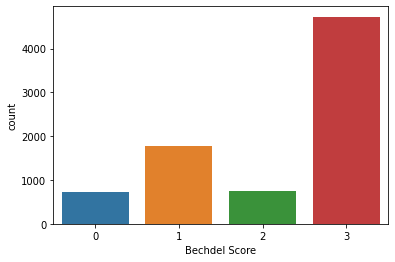

In [ ]:
#Primeiro, criarei um gráfico de contagem usando o Seaborn, para visualizar as pontuações de Bechdel.
import seaborn as sns
sns.countplot(x='Bechdel Score',data=dfNew)

In [ ]:
#A maioria dos filmes após o ano de 1967 parece ter pontuações mais altas de Bechdel, mas eles passam no teste de Bechdel?
li = []
for i in dfNew['Bechdel Score']:
    if(i<3):
        li.append(0)
    else:
        li.append(1)
dfNew['pass_test'] = li
dfNew

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,id,title,Bechdel Score,imdbid,pass_test
1201,1967-01-01,4722,"Fox, The",3,62990,1
1202,1967-01-01,2054,Marketa Lazarova,1,63278,0
1203,1967-01-01,6714,Uchu daikaiju Girara,3,62411,1
1204,1967-01-01,301,Cool Hand Luke,1,61512,0
1205,1967-01-01,2664,Casino Royale,2,61452,0
...,...,...,...,...,...,...
9185,2021-01-01,9647,Cousins,3,10483044,1
9186,2021-01-01,9962,"Tomorrow War, The",2,9777666,0
9187,2021-01-01,9574,Sentinelle,3,11734264,1
9188,2021-01-01,9682,Mortal Kombat,2,293429,0


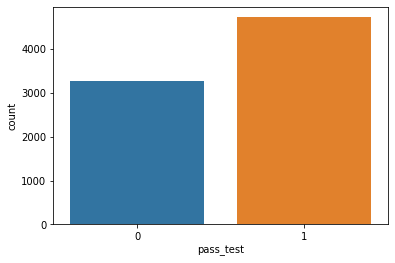

In [ ]:
#Agora, há um dataframe chamado pass test, com valor 1 para todos os filmes que passam no teste de Bechdel e valor 0 para os filmes que não passam.
#Vou visualizar isso usando o Seaborn.
sns.countplot(x='pass_test',data=dfNew)

Há mais filmes que passaram no teste de Bechdel em oposição aos que não passaram, desde o ano de 1967.
No entanto, essa diferença não é tão significativa quanto eu esperava. Ainda parece haver um grande número de filmes que não passaram no teste.


---


Agora, vou dar uma olhada em como a pontuação de Bechdel muda com o tempo.
Houve uma melhora na representação das mulheres na indústria cinematográfica? As coisas ainda são as mesmas? Eles pioraram?
Para fazer isso, usarei a biblioteca Plotnine.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


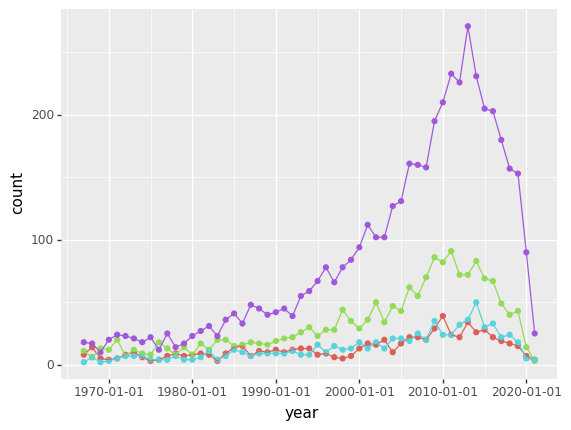

<ggplot: (8759590543393)>

In [ ]:
from plotnine import *
(ggplot(dfNew)+geom_point(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False)+geom_line(aes('year',color=dfNew['Bechdel Score']),stat='count',show_legend=False))



---


Nas décadas de 1970 e 1980, alguns filmes passaram no teste de Bechdel. Durante esse tempo, não houve diferença significativa entre os filmes que passaram no teste e os que não passaram.
Nos anos que se seguiram às décadas de 1980 e 1990, houve um aumento no número de filmes que passaram no teste de Bechdel, e houve uma grande melhoria no século XXI.


---
Agora, quero visualizar a relação entre a classificação IMDB e as pontuações Bechdel. Os filmes com pontuações Bechdel mais altas têm maior probabilidade de ter classificações mais altas no IMDB ou é o contrário?
Para fazer isso, usarei um conjunto de dados diferente chamado movies.csv e o mesclarei com meu quadro de dados existente.


In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/Projetos Data Science /Teste_Bechdel/movies.csv')
imdbNew = imdb[['title','rating']]
dfNew = pd.merge(dfNew, imdbNew, how='left', left_on=['title'], right_on=['title'])
dfNew.head()

,year,id,title,Bechdel Score,imdbid,pass_test,rating
0,1967-01-01,4722,"Fox, The",3,62990,1,6.4
1,1967-01-01,2054,Marketa Lazarova,1,63278,0,NaN
2,1967-01-01,6714,Uchu daikaiju Girara,3,62411,1,NaN
3,1967-01-01,301,Cool Hand Luke,1,61512,0,8.2
4,1967-01-01,2664,Casino Royale,2,61452,0,5.3


In [ ]:
#A coluna 'classificação' no dataframe representa as classificações do filme IMBD. Esta coluna possui alguns valores nulos e essas linhas serão eliminadas.
#Em seguida, criarei um novo quadro de dados com apenas o ano, a pontuação Bechdel e a classificação IMDB, para que possa visualizar a relação entre os três.
# Dropping rows with null values:
dfNew = dfNew.dropna()
dfNew = dfNew.drop('id',axis=1)
# Creating a new dataframe with only year, Bechdel scores, and imdb rating:
new = dfNew.groupby(['year','Bechdel Score']).agg({'rating':'mean'}).reset_index()
new.head()

,year,Bechdel Score,rating
0,1967-01-01,0,7.700000
1,1967-01-01,1,7.125000
2,1967-01-01,2,6.750000
3,1967-01-01,3,6.658333
4,1968-01-01,0,7.262500


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


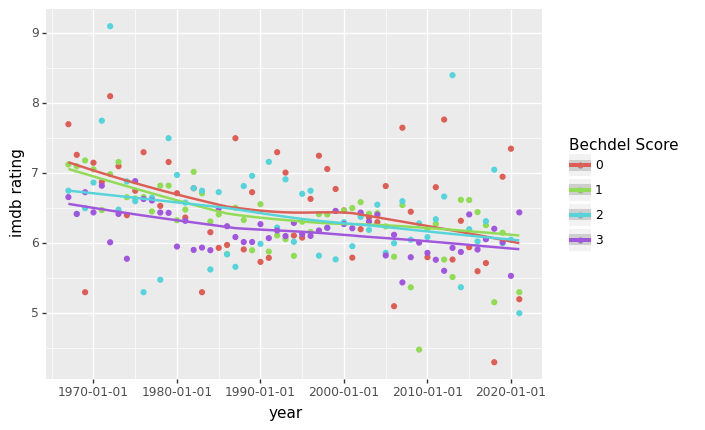

<ggplot: (8759554030705)>

In [ ]:
# Plotar o ano contra a classificação do IMDB e a pontuação de Bechdel:
ggplot(new,aes(x='year',y='rating',color='Bechdel Score'))+ geom_point()+geom_smooth()+scale_y_continuous(name="imdb rating")+labs( colour='Bechdel Score' )

Parece que os filmes que passam no teste de Bechdel têm classificações de IMDB significativamente mais baixas em comparação com filmes que não passam, o que foi bastante surpreendente para mim.


Agora, tentarei visualizar a relação entre o gênero do diretor e as pontuações de Bechdel. Presumo que os filmes com cineastas têm maior probabilidade de ter pontuações mais altas de Bechdel, o que tentarei traçar aqui.
Para fazer isso, usarei um conjunto de dados de filme diferente do Kaggle. Em seguida, usarei uma biblioteca de previsão de gênero para prever o gênero do diretor a partir de seu nome e mesclarei isso com o dataframe anterior.

In [ ]:
!pip install gender-guesser

     |████████████████████████████████| 379 kB 7.7 MB/s 


In [ ]:
import gender_guesser.detector as gen
latest = pd.read_csv('/content/drive/MyDrive/Projetos Data Science /Teste_Bechdel/movielatest.csv',encoding = "latin")
dfLatest = latest[['name','director']]
dfLatest.rename(columns={'name':'title'}, inplace=True)
dfLatest = pd.merge(dfNew, dfLatest, how='left', left_on=['title'], right_on=['title'])
dfLatest = dfLatest.dropna()
dfLatest.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,title,Bechdel Score,imdbid,pass_test,rating,director
2,1967-01-01,Casino Royale,2,61452,0,5.3,Martin Campbell
11,1967-01-01,Bedazzled,3,61391,1,6.8,Harold Ramis
12,1967-01-01,Bedazzled,3,61391,1,5.9,Harold Ramis
23,1968-01-01,Reconstruction,0,63493,0,8.4,Christoffer Boe
24,1968-01-01,Reconstruction,0,63493,0,7.1,Christoffer Boe


O quadro de dados recém-criado agora possui uma variável adicional; diretor. Vou agora tentar prever o sexo do diretor que recebeu seu primeiro nome e anexá-lo ao quadro de dados.

In [ ]:
# Predição do sexo do diretor baseado no primeiro nome
d = gen.Detector()
genders = []
firstNames = dfLatest['director'].str.split().str.get(0)
for i in firstNames[0:len(firstNames)]:
    if d.get_gender(i) == 'male':
        genders.append('homem')
    elif d.get_gender(i) == 'female':
        genders.append('mulher')
    else:
        genders.append('unknown')
dfLatest['gender'] = genders
dfLatest = dfLatest[dfLatest['gender'] != 'unknown']
# Encode the variable gender into a new dataframe:
dfLatest['Male'] = dfLatest['gender'].map( {'male':1, 'female':0} )
dfLatest.head()

,year,title,Bechdel Score,imdbid,pass_test,rating,director,gender,Male
2,1967-01-01,Casino Royale,2,61452,0,5.3,Martin Campbell,homem,NaN
11,1967-01-01,Bedazzled,3,61391,1,6.8,Harold Ramis,homem,NaN
12,1967-01-01,Bedazzled,3,61391,1,5.9,Harold Ramis,homem,NaN
23,1968-01-01,Reconstruction,0,63493,0,8.4,Christoffer Boe,homem,NaN
24,1968-01-01,Reconstruction,0,63493,0,7.1,Christoffer Boe,homem,NaN


O quadro de dados tem duas variáveis ​​adicionais; gênero e masculino. Gênero representa o gênero do diretor. A variável masculino tem valor 1 se o diretor for homem e 0 se ela for mulher.
Agora que tenho essas informações, irei em frente e visualizarei mais algumas tendências nos dados.
Vou criar um gráfico de contagem da variável gênero, para visualizar o número de homens para mulheres no conjunto de dados:

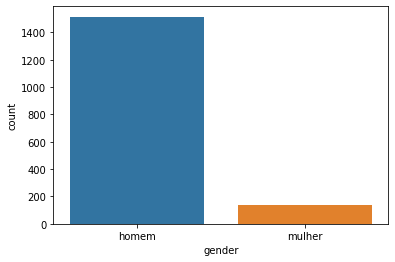

In [ ]:
sns.countplot(x='gender',data=dfLatest)

Parece que quase todos os filmes do conjunto de dados têm diretores homens. Novamente, isso era algo que eu esperava, já que Hollywood é conhecida por empregar um número muito pequeno de diretoras.
A seguir, visualizarei o gênero do diretor com a partitura de Bechdel, para ver se filmes com cineastas têm pontuação superior.

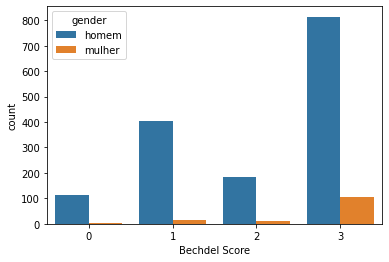

In [ ]:
sns.countplot(x='Bechdel Score',hue='gender',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


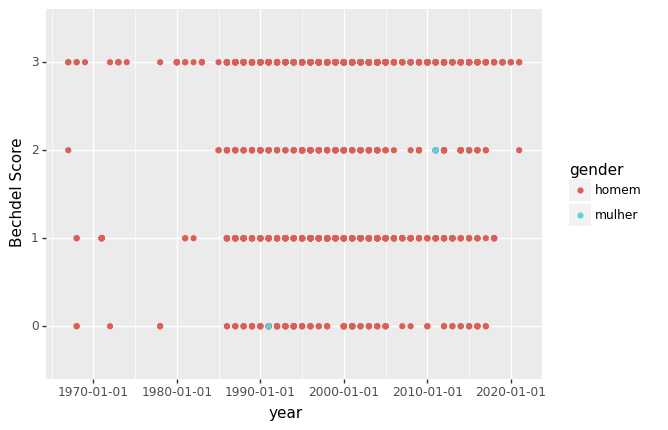

<ggplot: (8759550698717)>

In [ ]:
ggplot(aes(x = 'year', y = 'Bechdel Score',color='gender'), data = dfLatest)+geom_point()

# **Quase todos os filmes com cineastas parecem passar no teste de Bechdel!**

---


A seguir, vou dar uma olhada no orçamento variável, para ver se existe algum tipo de correlação entre o orçamento de um filme e sua pontuação de Bechdel.

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


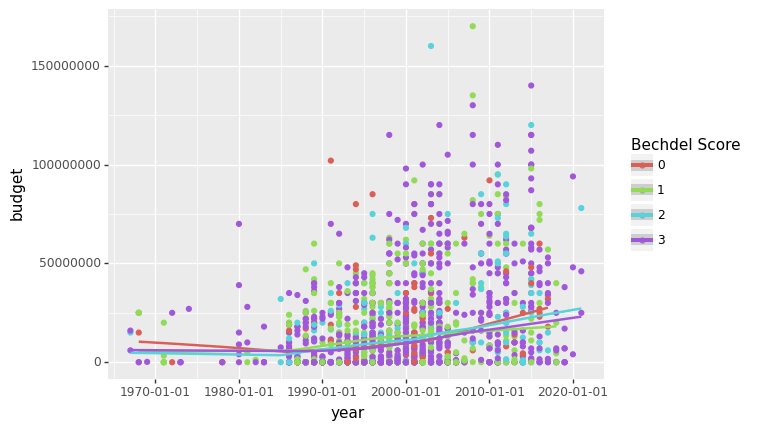

<ggplot: (8759550711073)>

In [ ]:

dfLatest['budget']=latest['budget']
ggplot(aes(x='year', y='budget',color='Bechdel Score'), data = dfLatest)+geom_point()+geom_smooth()

Uma coisa que pode ser vista aqui é um aumento significativo no orçamento de um filme com o tempo. Além disso, os filmes que passam no teste de Bechdel parecem ter um orçamento um pouco maior do que os filmes com pontuação zero, mas não há uma correlação forte que possa ser observada aqui.


Agora, vou visualizar a relação entre orçamento e gênero do diretor:

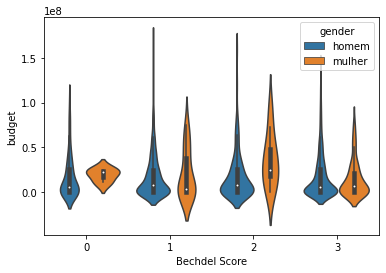

In [ ]:
sns.violinplot(x='Bechdel Score',y='budget',hue='gender',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


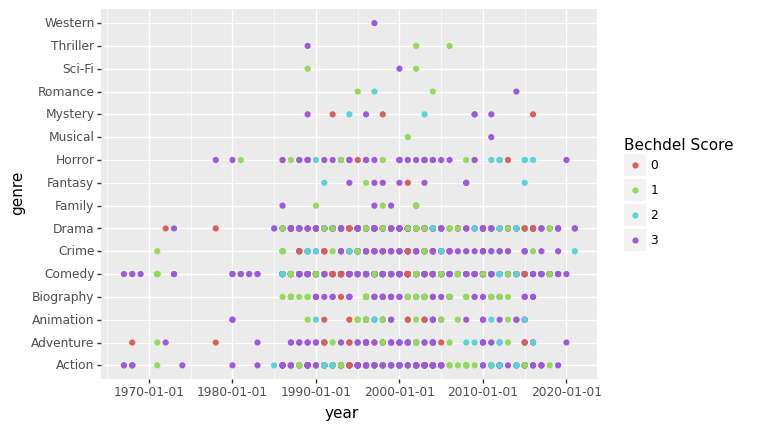

<ggplot: (8759550710765)>

In [ ]:
#A seguir, visualizarei o gênero de um filme e as partituras de Bechdel, e quaisquer mudanças com o tempo.
dfLatest['genre'] = latest['genre']
ggplot(aes(x = 'year', y = 'genre',color='Bechdel Score'), data = dfLatest)+geom_point()

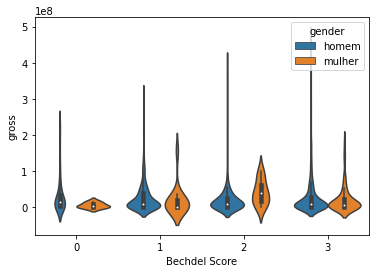

In [ ]:
#Finalmente, darei uma olhada nas receitas do filme, junto com o ano, as pontuações de Bechdel e o gênero:
dfLatest['gross'] = latest['gross']
# Movie grossing with Bechdel score and gender:
sns.violinplot(x='Bechdel Score',y='gross',hue='gender',data=dfLatest)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


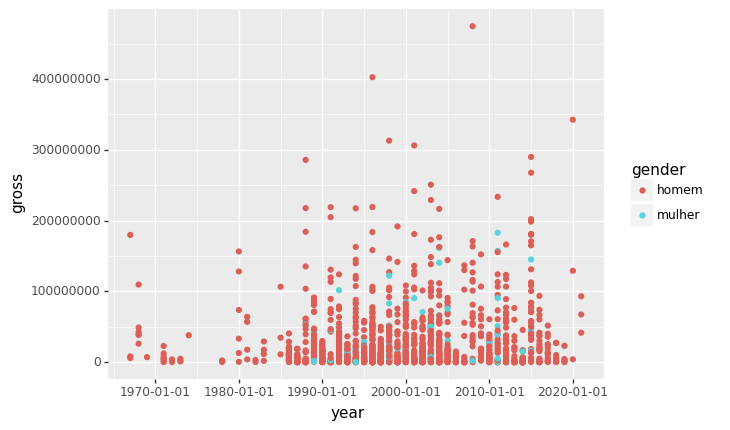

<ggplot: (8759551968205)>

In [ ]:
# filme de bilheteria com ano e gênero:
ggplot(aes(x = 'year', y = 'gross',color='gender'), data = dfLatest)+geom_point()

# E é isso! Consegui visualizar relacionamentos e responder a todas as questões de dados que me propus a encontrar respostas.

Algumas descobertas de dados interessantes incluem:


*   Filmes que falham no teste de Bechdel tendem a ter classificações mais altas de IMDB.
*   Ao longo dos anos, tem havido um número crescente de filmes que passam no teste de Bechdel.
*   Filmes com cineastas têm pontuações Bechdel mais altas.
*  Não existe uma correlação clara entre o orçamento ou receita de um filme e sua pontuação de Bechdel.

Claro, essa análise foi feita apenas com os dados que reuni em três lugares e pode não representar toda a população de filmes lá fora.

Além disso, pode ter havido outras variáveis ​​presentes que afetaram o resultado desta análise, e pode ser uma boa ideia experimentar com dados de alguns outros lugares antes de chegar a uma conclusão.

Por fim, gostaria de mencionar que o teste de Bechdel não é necessariamente o melhor benchmark para medir a representação feminina no cinema. Não leva em consideração o quão bem escrita é uma personagem feminina, nem mede a profundidade significativa do personagem.

No entanto, é uma das métricas mais conhecidas usadas para expor o preconceito de gênero e é o único teste no qual temos esse tipo de dados.